<a href="https://colab.research.google.com/github/adarsh-nl/Markov-Decision-Process/blob/main/gym_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 17.3 MB/s eta 0:00:00


In [ ]:
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https:

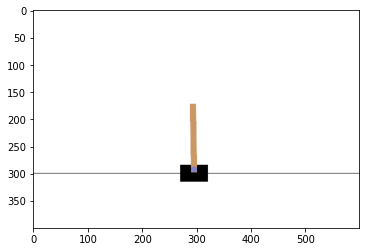

In [ ]:
import os
import gym
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

env = gym.make("CartPole-v1")#, render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42, return_info=True)

for _ in range(50):
    observation, reward, done, info = env.step(env.action_space.sample())

    if done:
        observation, info = env.reset(return_info=True)
        
    clear_output(wait=True)
    plt.imshow( env.render(mode='rgb_array') )
    plt.show()

env.close()

In [ ]:
import os
import gym
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

env = gym.make("CartPole-v1")#, render_mode="human")

env.reset()


array([-0.02905414, -0.04199108, -0.04114462, -0.01542564], dtype=float32)

In [ ]:
env.step(env.action_space.sample())

(array([-0.02989396,  0.15369605, -0.04145313, -0.32080102], dtype=float32),
 1.0,
 False,
 {})

In [ ]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [ ]:
env.action_space

Discrete(2)

In [ ]:
env.reset()

array([-0.007687  ,  1.4125829 , -0.77861696,  0.07387268,  0.00891403,
        0.1763685 ,  0.        ,  0.        ], dtype=float32)

In [ ]:
env.reward_range

(-inf, inf)

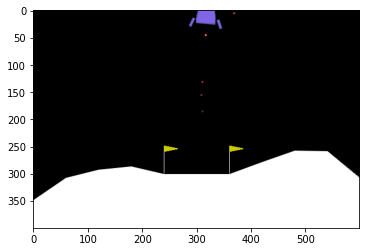

In [ ]:
import os
import gym
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

env = gym.make("LunarLander-v2")#, render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(return_info=True)

for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())

    if done:
        observation, info = env.reset(return_info=True)
        
    clear_output(wait=True)
    plt.imshow( env.render(mode='rgb_array') )
    plt.show()

env.close()

In [ ]:
import gym
import numpy as np

class Agent(gym.Env):
    def __init__(self, n_states, n_actions):
        self.observation_space = gym.spaces.Discrete(n_states)
        self.action_space = gym.spaces.Discrete(n_actions)
        self.P = np.random.rand(n_states, n_actions, n_states)
        self.P /= self.P.sum(axis=2, keepdims=True)
        self.rewards = np.random.rand(n_states, n_actions)
        self.state = 0

    def step(self, action):
        #print('---')
        #print("{}".format(self.P[self.state, action]))
        next_state = np.random.choice(n_states, p=self.P[self.state, action])
        reward = self.rewards[self.state, action]
        self.state = next_state
        return next_state, reward

    def reset(self):
        self.state = 0
        return self.state

# Instantiate the environment
n_states = 5
n_actions = 5
env = Agent(n_states, n_actions)
"""
print(env.P)
print('--')
print(env.P[0,1,1])
"""
# Train an agent
for i in range(10):
    action = env.action_space.sample() # sample a random action
    next_state, reward= env.step(action)
    print(f"state: {state}, action: {action}, next_state: {next_state}, reward: {reward}")
    state = next_state


state: 2, action: 2, next_state: 1, reward: 0.7610119450413163
state: 1, action: 0, next_state: 0, reward: 0.8378071890724615
state: 0, action: 4, next_state: 4, reward: 0.3295599832813284
state: 4, action: 1, next_state: 2, reward: 0.8063942629122819
state: 2, action: 1, next_state: 2, reward: 0.753740567853472
state: 2, action: 0, next_state: 3, reward: 0.26026837935380254
state: 3, action: 1, next_state: 4, reward: 0.24297286137757212
state: 4, action: 1, next_state: 2, reward: 0.8063942629122819
state: 2, action: 2, next_state: 0, reward: 0.508604205776517
state: 0, action: 3, next_state: 0, reward: 0.8949553649813957
